## Have to download TeX for fancy plots...

In [4]:
# !sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

## And coninue...

In [17]:
# prompt: Mount my Drive and also import all of the necessary packages to plot things using matplotlib, numpy and pandas.

from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set up Seaborn style for better aesthetics
sns.set(style="ticks", palette='bright')
plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 15,
    "axes.titlesize": 18,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 150,  # High resolution
    "savefig.dpi": 300  # High resolution for saving
})

In [20]:
# State your working directory to access the data and save the figures
wd = '/content/drive/Shareddrives/Bachelor Research Project/Final_Results/3.3.2.Array_of_Cells_Member'


In [21]:
constant = pd.read_csv(f'{wd}/Constant/Constant.csv', header=None, names=['Time', 'Bext', 'Member Disp']) # done
neg_constant = pd.read_csv(f'{wd}/Negative_Constant/Negative_Constant.csv', header=None, names=['Time', 'Bext', 'Member Disp']) # done
increasing = pd.read_csv(f'{wd}/Increasing/Increasing.csv', header=None, names=['Time', 'Bext', 'Member Disp']) # processing
sinusoidal = pd.read_csv(f'{wd}/Sinusoidal/Sinusoidal.csv', header=None, names=['Time', 'Bext', 'Member Disp']) # done


In [22]:
sinusoidal

,Time,Bext,Member Disp
0,0.000,0.000000e+00,-1.440000e-07
1,0.005,3.001465e-01,-1.970271e-03
2,0.010,6.002663e-01,-4.625705e-03
3,0.015,9.003327e-01,-7.551016e-03
4,0.020,1.200319e+00,-1.028088e-02
...,...,...,...
996,4.980,1.200319e+00,-8.594684e-02
997,4.985,9.003327e-01,-8.672772e-02
998,4.990,6.002663e-01,-8.752168e-02
999,4.995,3.001465e-01,-8.832951e-02


In [23]:
# The constants for the unit cell

T = 5 # s
Lm = 10 # mm Length of member

## Final Graph

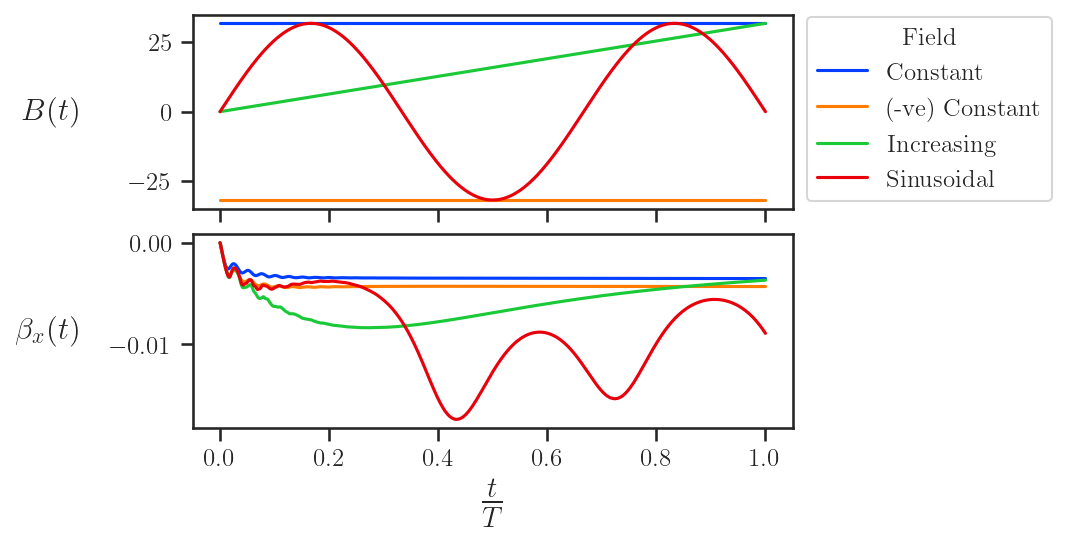

In [27]:
dfs = [constant, neg_constant, increasing, sinusoidal]

field = ['Constant', r'(-ve) Constant', 'Increasing', 'Sinusoidal']

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 3.5), layout='constrained')


j = 0
for i in dfs:
    # Plotting every fifth point
    ax[0].plot(i['Time']/T, i['Bext'], label=field[j])
    ax[1].plot(i['Time']/T, i['Member Disp']/Lm)
    j += 1

# Add legend
ax[0].legend(title='Field', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.1)


ax[1].set_xlabel(r'$\frac{t}{T}$', fontsize=20)

# Set the labels with proper LaTeX formatting
ax[0].set_ylabel(r'$B(t)$', rotation='horizontal', va='center', labelpad=37)
ax[1].set_ylabel(r'$\beta_x (t)$', rotation='horizontal', va='center', labelpad=30)

# ax[1].set_yticks(np.linspace(0, 0.3, 6))

plt.savefig(f'{wd}/P5_Array_Member_Response.svg', dpi=300)
plt.savefig(f'{wd}/P5_Array_Member_Response.png', dpi=300)

plt.show()
